# Use burnman for EOS
[burnman](https://geodynamics.github.io/burnman) has a whole library of equations of state implemented ready to use! Here is an example of how to use it in MOAI.

Let's get the simple magma ocean that we created in the first chapter:

In [1]:
from MO_lib.eq_basic import MO

No file found: calculating lookups, be patient it can take some time!


Now, let's prepare a better set of equations of state from deKoker and Stixrude 2013 for molten MgSiO$_3$, as implemented in burnman:

In [3]:
from burnman.minerals.DKS_2013_liquids import MgSiO3_liquid
# Equations of state for MgSiO3 liquid [de Koker and Stixrude 2013]

rho   = lambda p,T:MgSiO3_liquid().evaluate(['density'],p,T)
alpha = lambda p,T:MgSiO3_liquid().evaluate(['thermal_expansivity'],p,T)
cp    = lambda p,T:MgSiO3_liquid().evaluate(['C_p'],p,T)/MgSiO3_liquid().molar_mass

# Need to vectorize: burnman struggles otherwise
from numpy import vectorize
rho_vec   = vectorize(rho)
alpha_vec = vectorize(alpha)
cp_vec    = vectorize(cp)

Create a new magma ocean with these equations of state, but othrewise similar to the other one:

In [5]:
from magma_ocean import magma_ocean
MO_burnman = magma_ocean(MO.adiabat.T_pot,
                         MO.p_CMB, # for fractional crystallization cases, we have to make the MO believe that 
                         eos={'rho':rho_vec,'alpha':alpha_vec,'cp':cp_vec},
                         g=MO.gravity,
                         R=MO.R_out,
                         ConvCum=True)

And now, let's compare:

Text(0, 0.5, 'pressure [GPa]')

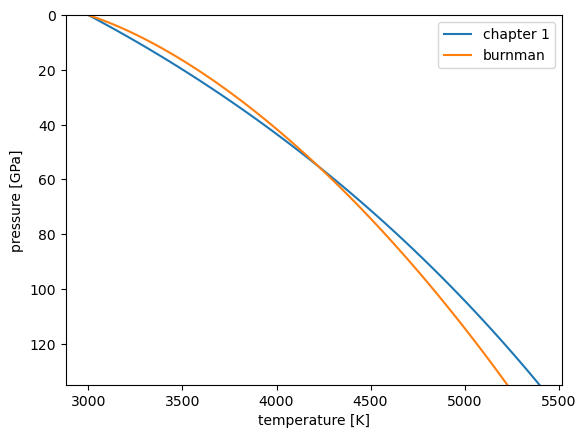

In [6]:
import matplotlib.pyplot as plt
plt.plot(MO.profiles['temperatures'],MO.profiles['pressures']*1e-9,label='chapter 1')
plt.plot(MO_burnman.profiles['temperatures'],MO_burnman.profiles['pressures']*1e-9,label='burnman')
plt.ylim(135,0)
plt.legend()
plt.xlabel('temperature [K]')
plt.ylabel('pressure [GPa]')